In [12]:
from neuron import h, gui
from helpers.record import *
import numpy as np
import copy
from importlib import reload
from helpers import ap, rheobase, generic, stimulation, rmp
from cells.hallermann2012 import iteration2

reload(iteration2)
reload(generic)
config = iteration2.Config()
cellbuilder = lambda: iteration2.SPI6(config)

In [6]:
config = iteration2.Config(celsius=4)

In [8]:
config.celsius = 3

In [14]:
def calculateInputResistanceTraces(cellbuilder, params = None, mult=-0.005, iterations=10 , startoffset=300, endoffset=100 , delay=100, duration=500, plot=True):
    if not params:
        params = [{"delay":delay,"dur":duration,"amp": 0 + mult*i} for i in range(0,iterations)]
    
    outputs = []
        
    for param in params:
        cell = cellbuilder()
        singlepulse = h.IClamp(cell.soma(0.5))
        singlepulse.delay = param["delay"]
        singlepulse.dur = param["dur"]
        singlepulse.amp = param["amp"]

        apc = h.APCount(cell.soma(0.5))
        #apc.thresh = 40

        v_vec = h.Vector()
        a_vec = h.Vector()# Membrane potential vector
        t_vec = h.Vector()  
        v_vec.record(cell.soma(0.5)._ref_v)
        t_vec.record(h._ref_t)
        apc.record(a_vec)
        
        
        h.tstop = delay + duration + 300
        h.run()
        outputs.append({"v": np.array(v_vec), "t": np.array(t_vec) ,"aps": np.array(a_vec), "params": param})
        
    return outputs

outputs = calculateInputResistanceTraces(cellbuilder, mult=-0.025, iterations=8, plot=True, delay=300, duration=500)

-81.79083580010197
-81.79921810857084
MaxDef for0.0 is-81.79083580010197
-83.45058811847964
-83.03874749377614
MaxDef for-0.025 is-83.45058811847964
-85.1968740881757
-84.36650036297951
MaxDef for-0.05 is-85.1968740881757
-86.97466925424288
-85.75491460997802
MaxDef for-0.07500000000000001 is-86.97466925424288
-88.77921525268414
-87.1692071948312
MaxDef for-0.1 is-88.77921525268414
-90.60281990563251
-88.57649339760496
MaxDef for-0.125 is-90.60281990563251
-92.43636659278096
-89.95230514960225
MaxDef for-0.15000000000000002 is-92.43636659278096
-94.27076996685624
-91.28203723487718
MaxDef for-0.17500000000000002 is-94.27076996685624


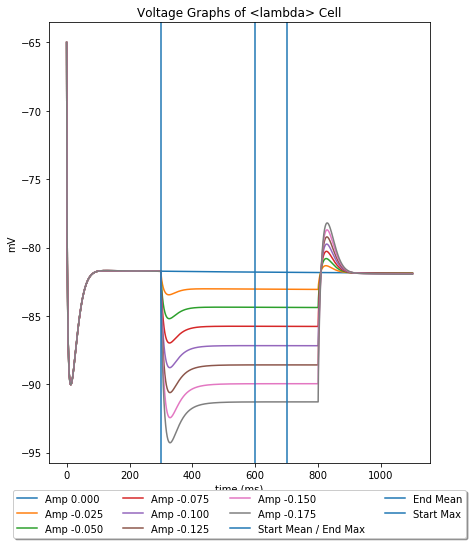

In [35]:
startoffset=300
endoffset = 100
mult=-0.025
values = []
plot= True
for traces in outputs:
    if traces["aps"].shape[0] > 1 : 
        print("This Trace Contains APS do not regard", traces["params"])
        break

    startx = traces["params"]["delay"]
    durationx = traces["params"]["dur"]
    
    stablestart = generic.timetoframe(traces["t"],startx+startoffset)
    stableend =generic.timetoframe(traces["t"],startx+durationx-endoffset)
    startcurve = generic.timetoframe(traces["t"],startx)
    
    
    vcurvestable = traces["v"][stablestart:stableend]
    vcurvemaxdef = traces["v"][startcurve:stablestart]
                               
    stablevalue = vcurvestable.mean()
    maxvalue = vcurvemaxdef.min() if mult < 0 else vcurvemaxdef.max()
    print(maxvalue)
    print(stablevalue)
    print("MaxDef for" + str(traces["params"]["amp"]) + " is" + str(maxvalue))                   
    values.append([stablevalue,maxvalue,traces["params"]["amp"]])                          
    import matplotlib.pyplot as plt
    
resistances = []
baselinestable = values[0][0]
others = values[1:]
for pair in others:
        stablev, maxvalue, amp = pair
        resistances.append([amp,abs((stablev - baselinestable))/abs(amp),abs((maxvalue - baselinestable))/abs(amp)])


if plot is True:
    import matplotlib.pyplot
    fig = pyplot.figure(figsize=(15,9)) # Default figsize is (8,6)
    ax = pyplot.subplot(121)
    for trace in outputs:
        ax.plot(trace["t"], trace["v"], label="Amp {0:.3f}".format(trace["params"]["amp"]))
    
    ax.axvline(startx+startoffset, label="Start Mean / End Max", linestyle="-")    
    ax.axvline(startx+durationx-endoffset, label="End Mean", linestyle="-")
    ax.axvline(startx, label="Start Max" , linestyle="-")
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('mV')
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])
    ax.set_title("Voltage Graphs of " + cellbuilder.__name__ + " Cell")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=4)
    pyplot.show()




In [30]:
import matplotlib.pyplot as plt

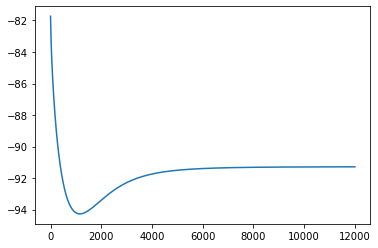

In [36]:
plt.plot(vcurvemaxdef)

In [32]:
vcurvemaxdef.min()

-94.27076996685624